In [22]:
import os
import re
import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime

import matplotlib.pyplot as plt

In [2]:
DATA_PATH = os.path.join('BYBIT', 'data')

In [3]:
tickers = os.listdir(DATA_PATH)

In [4]:
pattern = r'\d\d\d\d-\d\d-\d\d'
mathches = re.findall(pattern, os.listdir(os.path.join(DATA_PATH, tickers[0]))[0])

In [5]:
data = mathches[0]

In [6]:
data

'2024-10-20'

In [7]:
pd.read_parquet(os.path.join(DATA_PATH, tickers[0], os.listdir(os.path.join(DATA_PATH, tickers[0]))[-30])).set_index('timestamp')

,trade_id,direction,price,amount
timestamp,,,,
1729984778704,0037fca2-2758-5868-91ed-764ec1f87303,1,0.3331,6.3289
1729984778704,61f456f9-f1b0-5109-b506-f1c300f5e297,1,0.3331,5.3296
1729984778704,4ac96101-b72a-51f4-ac69-cac861c4c592,1,0.3331,119.5829
1729984778704,c65719ee-bfc5-5e44-9735-7f426966dc70,1,0.3331,6.9951
1729984778704,0037fca2-2758-5868-91ed-764ec1f87303,1,0.3331,6.3289
...,...,...,...,...
1729988395761,555551ad-72e2-50c6-9e96-9a7b85a0d6c1,-1,0.3319,165.9500
1729988396505,44e3495e-0d69-528e-b3f6-7d206d452df1,1,0.3320,5.3120
1729988396505,f74fc3fd-dd22-53e1-a065-d1b89c7bc0ef,1,0.3320,80.0120


In [8]:
data = {'lob': {}, 'trades': {}}

In [9]:
for _ticker in tickers[:1]:
    _files = os.listdir(os.path.join(DATA_PATH, _ticker))
    print(f'\nStart ticker: {_ticker}\n')
    lob_df, trades_df = None, None
    for _file in tqdm(_files):
        _f_type = _file.split('_')[0].strip().lower()
        _df = pd.read_parquet(os.path.join(DATA_PATH, _ticker, _file)).set_index('timestamp')
        if _f_type == 'lob':
            if lob_df is None:
                lob_df = _df.copy()
            else:
                lob_df = pd.concat([lob_df, _df])
        elif _f_type == 'trades':
            if trades_df is None:
                trades_df = _df.copy()
            else:
                trades_df = pd.concat([trades_df, _df])

    data['lob'][_ticker] = lob_df.copy()
    data['trades'][_ticker] = trades_df.copy()                


Start ticker: ADAUSDT



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420/420 [00:52<00:00,  7.98it/s]


In [10]:
data['trades']['ADAUSDT']

,trade_id,direction,price,amount
timestamp,,,,
1729369490283,598c4e0e-ed09-5fed-82ea-a2d2f7cc2793,1,0.3507,63.8274
1729369490283,1e3604ce-61e8-5351-9560-d579f3a47685,1,0.3507,548.8455
1729369490283,1867cdab-dd57-591d-867b-662acfe5ac43,1,0.3507,174.9993
1729369490283,bb36c186-d717-50d8-8154-9e1728f5f647,1,0.3508,12709.8348
1729369490283,b9642d8d-e172-5f56-9c20-a43decb30c70,1,0.3508,1398.2888
...,...,...,...,...
1730071310605,0128868d-2f1e-5c56-bb8b-f1e49dfe0526,-1,0.3402,6.8040
1730071310605,0128868d-2f1e-5c56-bb8b-f1e49dfe0526,-1,0.3402,6.8040
1730071310605,0128868d-2f1e-5c56-bb8b-f1e49dfe0526,-1,0.3402,6.8040


In [11]:
if not os.path.exists('data_parsed'):
    os.mkdir('data_parsed')

if not os.path.exists(os.path.join('data_parsed', 'lob')):
    os.mkdir(os.path.join('data_parsed', 'lob'))

if not os.path.exists(os.path.join('data_parsed', 'trades')):
    os.mkdir(os.path.join('data_parsed', 'trades'))

# if one wants to save as csv
# for _ticker in tqdm(tickers):
#     lob_df = data['lob'][_ticker]
#     trades_df = data['trades'][_ticker]

#     lob_df.to_csv(os.path.join('data_parsed', 'lob', f"{_ticker}.csv"))
#     trades_df.to_csv(os.path.join('data_parsed', 'trades', f"{_ticker}.csv"))

In [12]:
TICK = list(data['lob'].keys())[0]

In [13]:
data['lob'][TICK]

,asks[0].price,asks[1].price,asks[2].price,asks[3].price,asks[4].price,asks[5].price,asks[6].price,asks[7].price,asks[8].price,asks[9].price,...,bids[15].amount,bids[16].amount,bids[17].amount,bids[18].amount,bids[19].amount,bids[20].amount,bids[21].amount,bids[22].amount,bids[23].amount,bids[24].amount
timestamp,,,,,,,,,,,,,,,,,,,,,
1729369511280,0.3508,0.3509,0.3510,0.3511,0.3512,0.3513,0.3514,0.3515,0.3516,0.3517,...,86521.0,124801.0,106826.0,293275.0,42329.0,50223.0,150707.0,92068.0,56045.0,69979.0
1729369512980,0.3508,0.3509,0.3510,0.3511,0.3512,0.3513,0.3514,0.3515,0.3516,0.3517,...,86521.0,124801.0,106826.0,293275.0,42329.0,50223.0,150707.0,92068.0,56045.0,69979.0
1729369513080,0.3508,0.3509,0.3510,0.3511,0.3512,0.3513,0.3514,0.3515,0.3516,0.3517,...,86521.0,124801.0,106826.0,293275.0,42329.0,50223.0,150707.0,92068.0,56045.0,69979.0
1729369513800,0.3508,0.3509,0.3510,0.3511,0.3512,0.3513,0.3514,0.3515,0.3516,0.3517,...,86521.0,124801.0,106826.0,293275.0,42329.0,50223.0,150707.0,92068.0,56045.0,69979.0
1729369514240,0.3508,0.3509,0.3510,0.3511,0.3512,0.3513,0.3514,0.3515,0.3516,0.3517,...,86521.0,124801.0,106826.0,293275.0,42329.0,50223.0,150707.0,92068.0,56045.0,69979.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730071321679,0.3423,0.3424,0.3425,0.3426,0.3427,0.3428,0.3429,0.3430,0.3431,0.3432,...,45790.0,181331.0,129028.0,215884.0,117512.0,92830.0,157504.0,380553.0,196516.0,231569.0
1730071321679,0.3423,0.3424,0.3425,0.3426,0.3427,0.3428,0.3429,0.3430,0.3431,0.3432,...,45790.0,181331.0,129028.0,215884.0,117512.0,92830.0,157504.0,380553.0,196516.0,231569.0
1730071321679,0.3423,0.3424,0.3425,0.3426,0.3427,0.3428,0.3429,0.3430,0.3431,0.3432,...,45790.0,181331.0,129028.0,215884.0,117512.0,92830.0,157504.0,380553.0,196516.0,231569.0


# Almgren Chriss Market Impact

https://www.smallake.kr/wp-content/uploads/2016/03/optliq.pdf

## Permanent Market Impact:

PMI = $\sum \tau x_k g(\frac{n_k}{\tau})$

It is not required, but more easier to assume g(\nu) to be linear : $g(\nu) = \gamma\nu$

with this form each unit drops price by $\gamma n$

Finally Permanent market impact takes the following form:

$PMI = \frac{1}{2}\gamma X^2 - \frac{1}{2}\gamma \sum n_k^2$


## Temporary Market Impact:

TMI = $\sum n_k h(\frac{n_k}{\tau})$

assuming $h(\nu)$ linear we get the following expression for temporary market impact:

$h(\frac{n_k}{\tau}) = \epsilon sign(n_k) + \frac{\eta}{\tau}n_k$


where $x_0, x_1, ..., x_N$ - trading trajectory with $x_0 = X$ and $x_N = 0$

equivalently we define a 'trade list' $n_1, n_2, ..., n_N$:

$n_k = x_{k-1}-x_k$, $x_k = X - \sum_{j=1}^kn_j = \sum_{j=k+1}^Nx_k$

In [14]:
def calc_vwap(x):
    return x

In [67]:
vwap_asks, vwap_bids = [], []

for _sub in tqdm(data['lob'][TICK].rolling(window=1)):
    ask_vwap, bid_vwap = 0, 0
    ask_weights, bid_weights = 0, 0

    for i in range(25):
        a_p, a_w = _sub[f'asks[{i}].price'].values[0], _sub[f'asks[{i}].amount'].values[0]
        b_p, b_w = _sub[f'bids[{i}].price'].values[0], _sub[f'bids[{i}].amount'].values[0]

        ask_vwap += a_p * a_w
        ask_weights += a_w

        bid_vwap += b_p * b_w
        bid_weights += b_w

    vwap_asks.append(ask_vwap / ask_weights)
    vwap_bids.append(bid_vwap / bid_weights)

915222it [58:09, 262.27it/s]


In [73]:
data['lob'][TICK]["vwap_asks"]=vwap_asks
data['lob'][TICK]["vwap_bids"]=vwap_bids

In [74]:
data['trades'][TICK]

,trade_id,direction,price,amount
timestamp,,,,
1729369490283,598c4e0e-ed09-5fed-82ea-a2d2f7cc2793,1,0.3507,63.8274
1729369490283,1e3604ce-61e8-5351-9560-d579f3a47685,1,0.3507,548.8455
1729369490283,1867cdab-dd57-591d-867b-662acfe5ac43,1,0.3507,174.9993
1729369490283,bb36c186-d717-50d8-8154-9e1728f5f647,1,0.3508,12709.8348
1729369490283,b9642d8d-e172-5f56-9c20-a43decb30c70,1,0.3508,1398.2888
...,...,...,...,...
1730071310605,0128868d-2f1e-5c56-bb8b-f1e49dfe0526,-1,0.3402,6.8040
1730071310605,0128868d-2f1e-5c56-bb8b-f1e49dfe0526,-1,0.3402,6.8040
1730071310605,0128868d-2f1e-5c56-bb8b-f1e49dfe0526,-1,0.3402,6.8040


In [18]:
# lets take first 10000 for testing
trades_df = data['trades'][TICK]

In [20]:
buy_sells_df = trades_df.groupby('timestamp').apply(lambda x: pd.Series({
                    'sells': (x[x.direction == 1].price * x[x.direction == 1].amount).sum(),
                    'buys': -1 * (x[x.direction == -1].price * x[x.direction == -1].amount).sum()
                }))


In [21]:
import time 

time.time() - list(trades_df.index)[0] / 10**3

1121991.216472149

In [30]:
from datetime import datetime

dates = list(map(lambda x: datetime.fromtimestamp(x / 10**3) , list(buy_sells_df.index)))
dates.sort()
len(dates)

buy_sells_df.index = dates

In [31]:
dates = list(map(lambda x: datetime.fromtimestamp(x / 10**3) , list(data['lob'][TICK].index)))
dates.sort()
len(dates)

data['lob'][TICK].index = dates

нужно сделать так: сгруппировать по минутам, взять последнее за минуту и по соответствующим минутам взять

In [75]:
lob_df = data['lob'][TICK]

In [76]:
buy_sells_df.head()

,sells,buys
2024-10-19 23:24:50.283,3.310246e+06,-0.000000
2024-10-19 23:25:21.089,0.000000e+00,-125059.190042
2024-10-19 23:25:36.581,0.000000e+00,-226332.521346
2024-10-19 23:25:39.031,0.000000e+00,-1018.919973
2024-10-19 23:25:47.030,7.341296e+04,-0.000000


In [77]:
lob_df.head()

,asks[0].price,asks[1].price,asks[2].price,asks[3].price,asks[4].price,asks[5].price,asks[6].price,asks[7].price,asks[8].price,asks[9].price,...,bids[17].amount,bids[18].amount,bids[19].amount,bids[20].amount,bids[21].amount,bids[22].amount,bids[23].amount,bids[24].amount,vwap_asks,vwap_bids
2024-10-19 23:25:11.280,0.3508,0.3509,0.351,0.3511,0.3512,0.3513,0.3514,0.3515,0.3516,0.3517,...,106826.0,293275.0,42329.0,50223.0,150707.0,92068.0,56045.0,69979.0,0.351843,0.349487
2024-10-19 23:25:12.980,0.3508,0.3509,0.351,0.3511,0.3512,0.3513,0.3514,0.3515,0.3516,0.3517,...,106826.0,293275.0,42329.0,50223.0,150707.0,92068.0,56045.0,69979.0,0.351846,0.349487
2024-10-19 23:25:13.080,0.3508,0.3509,0.351,0.3511,0.3512,0.3513,0.3514,0.3515,0.3516,0.3517,...,106826.0,293275.0,42329.0,50223.0,150707.0,92068.0,56045.0,69979.0,0.351846,0.349487
2024-10-19 23:25:13.800,0.3508,0.3509,0.351,0.3511,0.3512,0.3513,0.3514,0.3515,0.3516,0.3517,...,106826.0,293275.0,42329.0,50223.0,150707.0,92068.0,56045.0,69979.0,0.351846,0.349488
2024-10-19 23:25:14.240,0.3508,0.3509,0.351,0.3511,0.3512,0.3513,0.3514,0.3515,0.3516,0.3517,...,106826.0,293275.0,42329.0,50223.0,150707.0,92068.0,56045.0,69979.0,0.351846,0.349488


In [86]:
lob_df.resample('1min', closed='right').last()
lob_df.resample('1min').last('1min')

,asks[0].price,asks[1].price,asks[2].price,asks[3].price,asks[4].price,asks[5].price,asks[6].price,asks[7].price,asks[8].price,asks[9].price,...,bids[17].amount,bids[18].amount,bids[19].amount,bids[20].amount,bids[21].amount,bids[22].amount,bids[23].amount,bids[24].amount,vwap_asks,vwap_bids
2024-10-19 23:25:00,0.3508,0.3509,0.3510,0.3511,0.3512,0.3513,0.3514,0.3515,0.3516,0.3517,...,305114.0,62384.0,50328.0,150426.0,91488.0,56417.0,73321.0,232837.0,0.351971,0.349315
2024-10-19 23:26:00,0.3508,0.3509,0.3510,0.3511,0.3512,0.3513,0.3514,0.3515,0.3516,0.3517,...,324572.0,43060.0,223149.0,150426.0,91769.0,61075.0,66174.0,60054.0,0.351815,0.349349
2024-10-19 23:27:00,0.3508,0.3509,0.3510,0.3511,0.3512,0.3513,0.3514,0.3515,0.3516,0.3517,...,310485.0,36683.0,223077.0,150426.0,100090.0,61635.0,66174.0,61327.0,0.351837,0.349371
2024-10-19 23:28:00,0.3508,0.3509,0.3510,0.3511,0.3512,0.3513,0.3514,0.3515,0.3516,0.3517,...,291299.0,36415.0,223077.0,150426.0,100108.0,61635.0,72472.0,533712.0,0.351886,0.349243
2024-10-19 23:29:00,0.3509,0.3510,0.3511,0.3512,0.3513,0.3514,0.3515,0.3516,0.3517,0.3518,...,291499.0,35500.0,223358.0,150444.0,100371.0,67943.0,63303.0,533117.0,0.351921,0.349264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-28 21:08:00,0.3423,0.3424,0.3425,0.3426,0.3427,0.3428,0.3429,0.3430,0.3431,0.3432,...,162237.0,78771.0,122975.0,160197.0,130932.0,322968.0,399097.0,228056.0,0.343328,0.338746
2024-10-28 21:09:00,0.3423,0.3424,0.3425,0.3426,0.3427,0.3428,0.3429,0.3430,0.3431,0.3432,...,70637.0,173806.0,110516.0,168228.0,130386.0,273169.0,217906.0,435033.0,0.343326,0.338751
2024-10-28 21:10:00,0.3423,0.3424,0.3425,0.3426,0.3427,0.3428,0.3429,0.3430,0.3431,0.3432,...,186946.0,63350.0,110485.0,168246.0,130417.0,262769.0,397209.0,326509.0,0.343322,0.338763
2024-10-28 21:11:00,0.3423,0.3424,0.3425,0.3426,0.3427,0.3428,0.3429,0.3430,0.3431,0.3432,...,245337.0,215884.0,117512.0,92830.0,224486.0,277799.0,301089.0,205165.0,0.343414,0.338710


In [99]:
(buy_sells_df.sells - buy_sells_df.buys).diff().resample('1min').last()

2024-10-19 23:24:00              NaN
2024-10-19 23:25:00     72394.035833
2024-10-19 23:26:00      2913.211129
2024-10-19 23:27:00       -11.442183
2024-10-19 23:28:00    598695.325118
                           ...      
2024-10-28 21:08:00      -220.766691
2024-10-28 21:09:00    -13689.220677
2024-10-28 21:10:00      4279.672457
2024-10-28 21:11:00     -1864.708693
2024-10-28 21:12:00        15.409750
Freq: min, Length: 12829, dtype: float64

In [89]:
_df = lob_df.copy()

$\frac{lob\_disbalance\_delta}{trades\_disbalance}$

In [151]:
TMI = (lob_df.vwap_asks - lob_df.vwap_bids).diff().resample('1min').last() / (buy_sells_df.sells + buy_sells_df.buys).resample('1min').last()

In [152]:
TMI.replace([np.inf, -np.inf], 0.0, inplace=True)

# Architecture

In [19]:
def load_ticker_data(ticker: str):
    _files = os.listdir(os.path.join(DATA_PATH, ticker))
    lob_df, trades_df = None, None
    for _file in tqdm(_files):
        _f_type = _file.split('_')[0].strip().lower()
        _df = pd.read_parquet(os.path.join(DATA_PATH, ticker, _file)).set_index('timestamp')
        if _f_type == 'lob':
            if lob_df is None:
                lob_df = _df.copy()
            else:
                lob_df = pd.concat([lob_df, _df])
        elif _f_type == 'trades':
            if trades_df is None:
                trades_df = _df.copy()
            else:
                trades_df = pd.concat([trades_df, _df])

    dates = list(map(lambda x: datetime.fromtimestamp(x / 10**3) , list(lob_df.index)))
    lob_df.index = dates

    lob_df = lob_df.resample('1min').last()

    vwap_asks, vwap_bids = [], []

    for _sub in tqdm(lob_df.rolling(window=1)):
        ask_vwap, bid_vwap = 0, 0
        ask_weights, bid_weights = 0, 0
    
        for i in range(25):
            a_p, a_w = _sub[f'asks[{i}].price'].values[0], _sub[f'asks[{i}].amount'].values[0]
            b_p, b_w = _sub[f'bids[{i}].price'].values[0], _sub[f'bids[{i}].amount'].values[0]
    
            ask_vwap += a_p * a_w
            ask_weights += a_w
    
            bid_vwap += b_p * b_w
            bid_weights += b_w
    
        vwap_asks.append(ask_vwap / ask_weights)
        vwap_bids.append(bid_vwap / bid_weights)

    lob_df["vwap_asks"]=vwap_asks
    lob_df["vwap_bids"]=vwap_bids

    trades_df = trades_df.groupby('timestamp').apply(lambda x: pd.Series({
                    'sells': (x[x.direction == 1].price * x[x.direction == 1].amount).sum(),
                    'buys': -1 * (x[x.direction == -1].price * x[x.direction == -1].amount).sum()
                }))

    dates = list(map(lambda x: datetime.fromtimestamp(x / 10**3) , list(trades_df.index)))
    trades_df.index = dates

    # dates = list(map(lambda x: datetime.fromtimestamp(x / 10**3) , list(trades_df.index)))
    # trades_df.index = dates

    # dates = list(map(lambda x: datetime.fromtimestamp(x / 10**3) , list(data['lob'][TICK].index)))
    # lob_df.index = dates


    return lob_df[["vwap_asks", "vwap_bids"]], trades_df

In [60]:
def calc_TMI(trades_df, lob_df, period):
    TMI = (lob_df.vwap_asks - lob_df.vwap_bids).diff().resample(period).last() / (trades_df.sells + trades_df.buys).resample(period).last()

    TMI = TMI.where(TMI > 0, np.nan).ffill()
    
    return TMI

def calc_PMI(trades_df, lob_df):
    # PMI = (lob_df.vwap_asks - lob_df.vwap_bids).diff().resample('W').last('1D') / (trades_df.sells + trades_df.buys).resample('W').last('1D')
    # return PMI

    _df = (lob_df.vwap_asks - lob_df.vwap_bids).diff().resample('1D').last('1D')

    PMI = _df / _df.shift(3)

    PMI = PMI.where(PMI > 0, np.nan).ffill()

    return PMI

In [16]:
tickers = os.listdir(DATA_PATH)

In [187]:
del data
del lob_df
del trades_df

# ADAUSDT

In [71]:
lob, trade = load_ticker_data(tickers[0])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420/420 [00:52<00:00,  8.01it/s]
12828it [00:46, 274.69it/s]


In [72]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

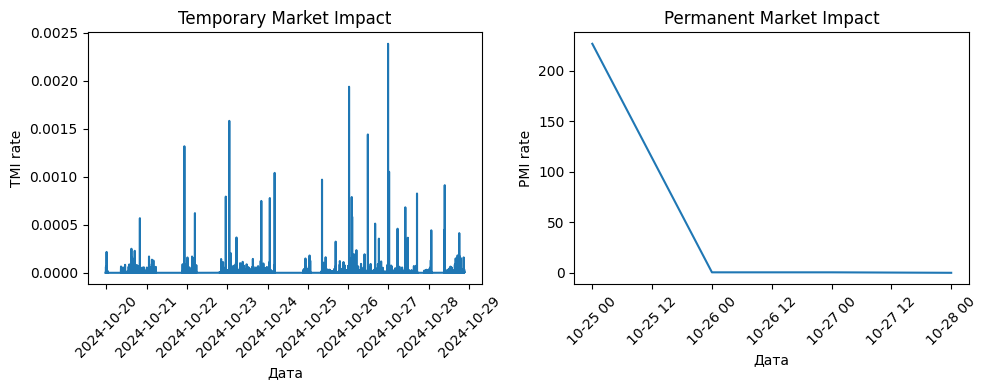

In [73]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# APTUSDT

In [74]:
lob, trade = load_ticker_data(tickers[1])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420/420 [00:50<00:00,  8.33it/s]
12828it [00:45, 284.94it/s]


In [75]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

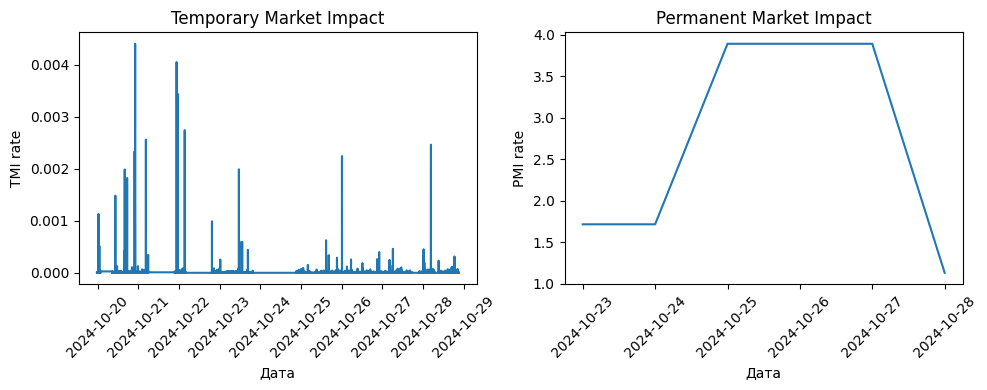

In [76]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# AVAXUSDT

In [77]:
lob, trade = load_ticker_data(tickers[2])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420/420 [00:47<00:00,  8.92it/s]
12828it [00:45, 282.30it/s]


In [78]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

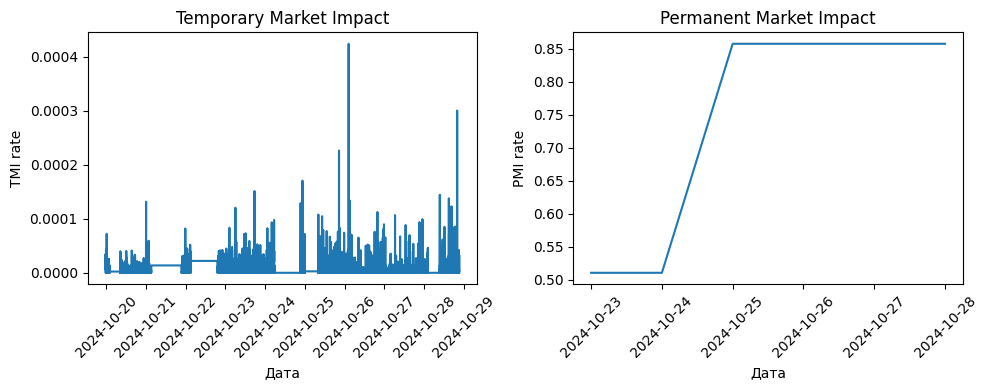

In [79]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# BNBUSDT

In [80]:
lob, trade = load_ticker_data(tickers[3])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 422/422 [00:43<00:00,  9.81it/s]
12828it [00:40, 315.91it/s]


In [81]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

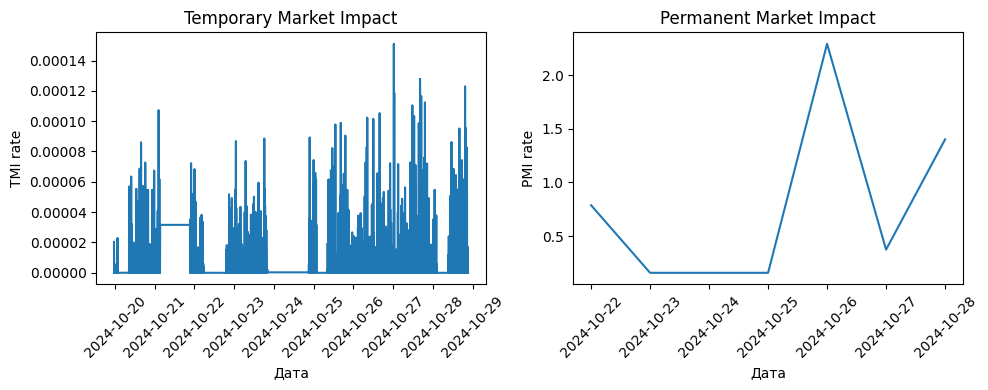

In [82]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# BTCUSDT

In [83]:
lob, trade = load_ticker_data(tickers[4])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 424/424 [00:41<00:00, 10.15it/s]
12829it [00:39, 324.30it/s]


In [84]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

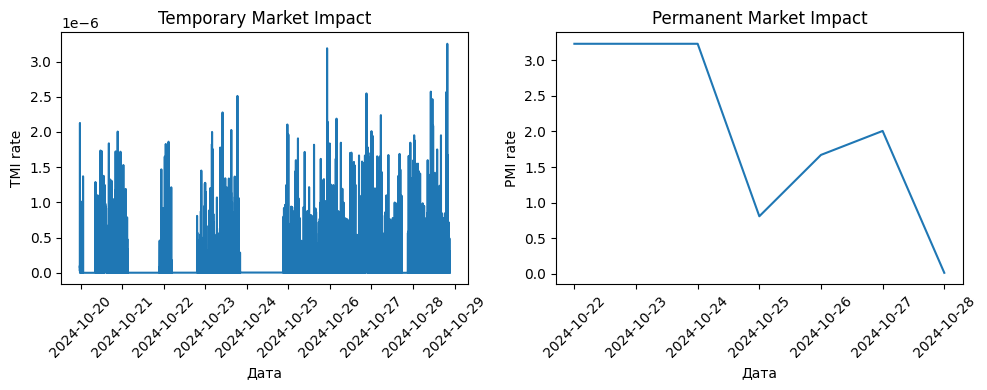

In [85]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# DOGEUSDT

In [86]:
lob, trade = load_ticker_data(tickers[5])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420/420 [01:01<00:00,  6.88it/s]
12828it [00:39, 323.63it/s]


In [87]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

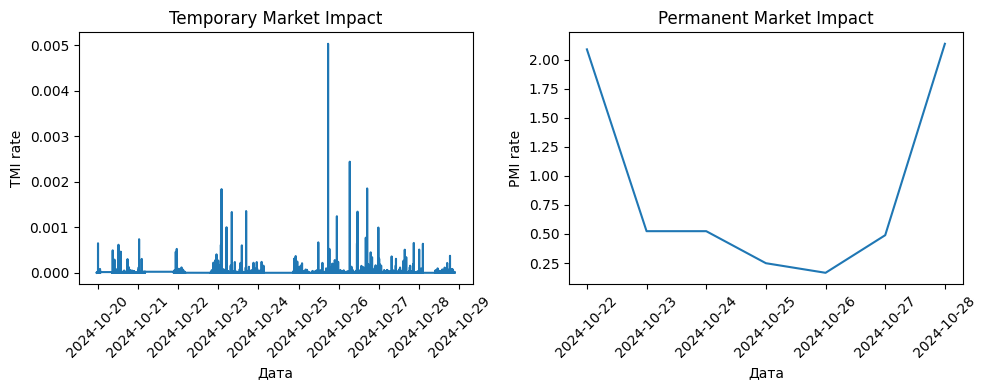

In [88]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# DOTUSDT

In [89]:
lob, trade = load_ticker_data(tickers[6])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420/420 [00:51<00:00,  8.19it/s]
12828it [00:44, 286.97it/s]


In [90]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

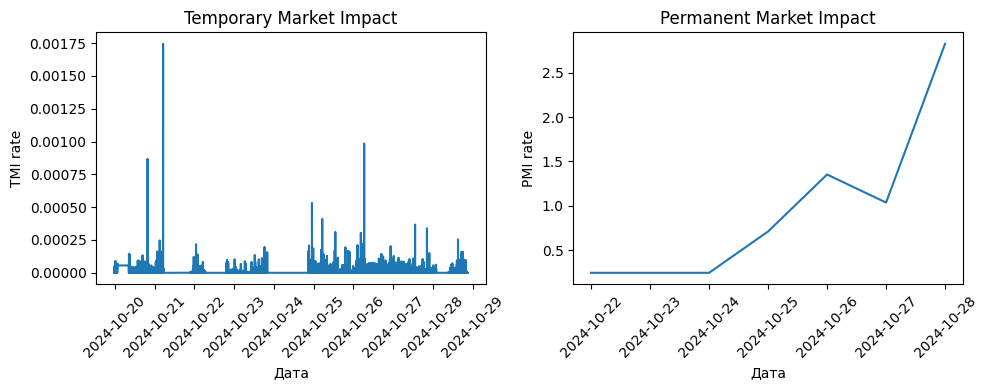

In [91]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ETHUSDT

In [92]:
lob, trade = load_ticker_data(tickers[7])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 422/422 [00:51<00:00,  8.27it/s]
12828it [00:37, 341.98it/s]


In [93]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

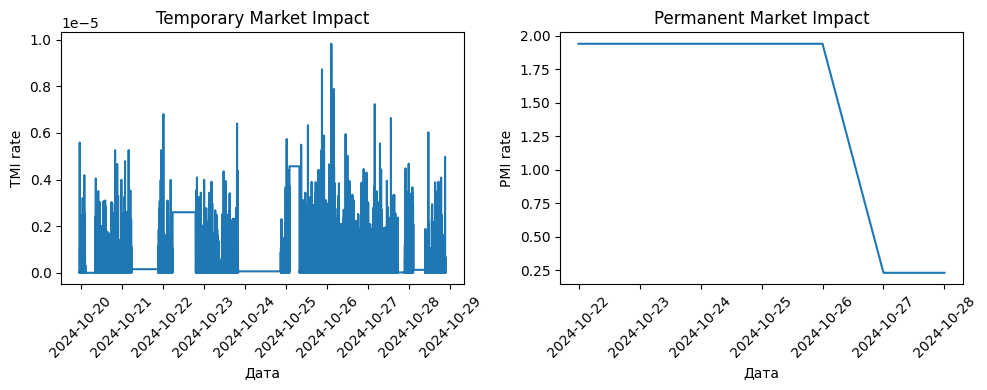

In [94]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# KASUSDT

In [95]:
lob, trade = load_ticker_data(tickers[8])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420/420 [00:48<00:00,  8.72it/s]
12828it [00:35, 366.30it/s]


In [96]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

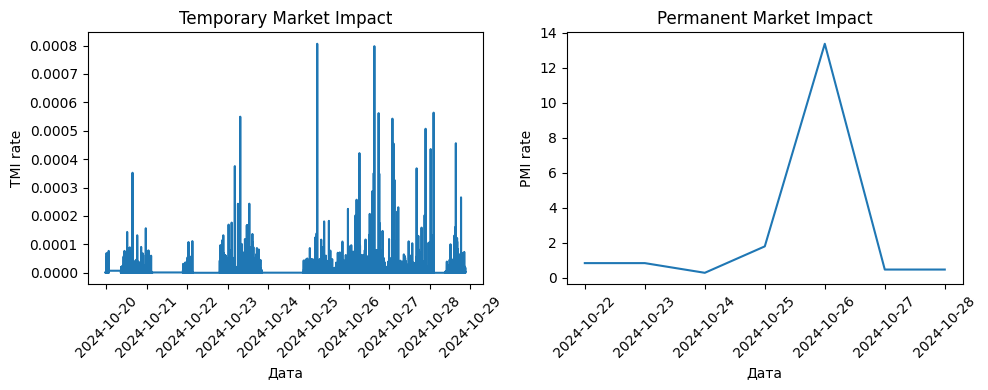

In [97]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# LINKUSDT

In [98]:
lob, trade = load_ticker_data(tickers[9])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420/420 [00:52<00:00,  7.99it/s]
12828it [00:36, 347.91it/s]


In [99]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

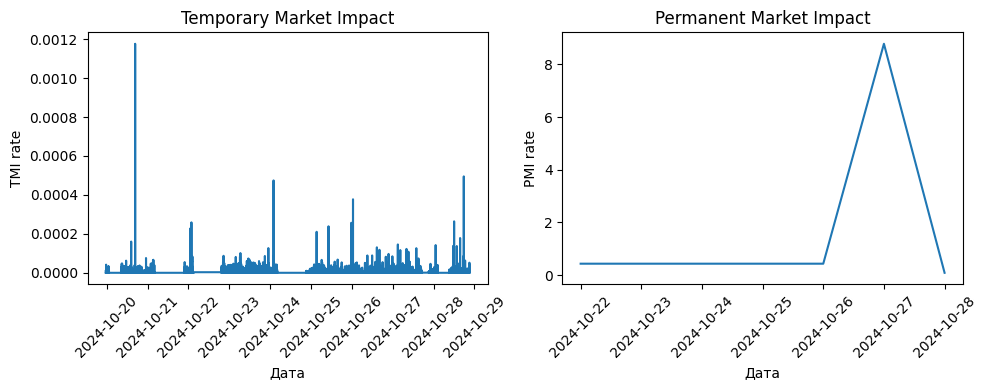

In [100]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# LTCUSDT

In [101]:
lob, trade = load_ticker_data(tickers[10])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420/420 [00:43<00:00,  9.57it/s]
12828it [00:34, 370.18it/s]


In [102]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

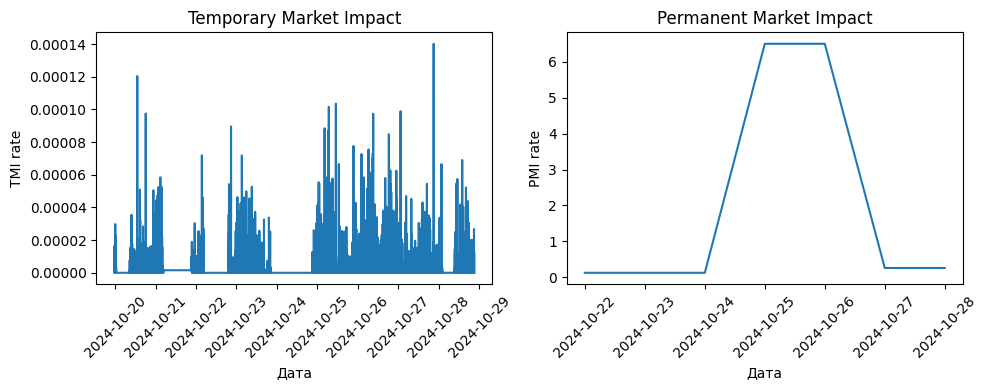

In [103]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# MNTUSDT

In [104]:
lob, trade = load_ticker_data(tickers[12])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420/420 [00:43<00:00,  9.71it/s]
12828it [00:37, 342.11it/s]


In [105]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

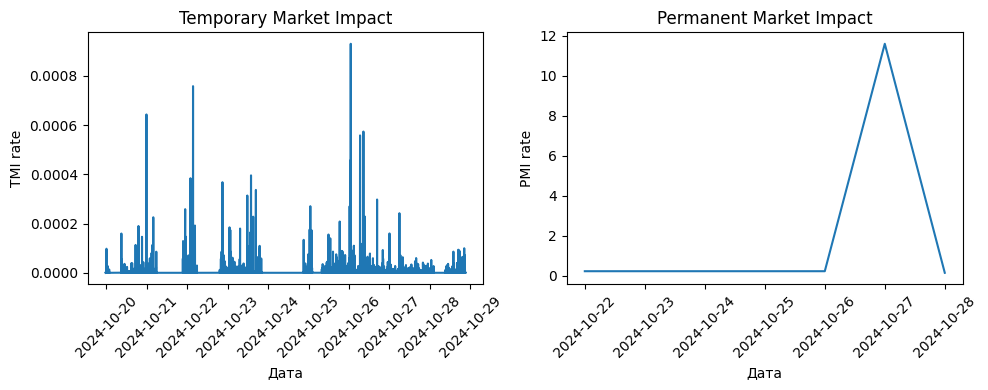

In [106]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# NEARUSDT

In [107]:
lob, trade = load_ticker_data(tickers[13])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420/420 [00:45<00:00,  9.29it/s]
12828it [00:36, 349.44it/s]


In [108]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

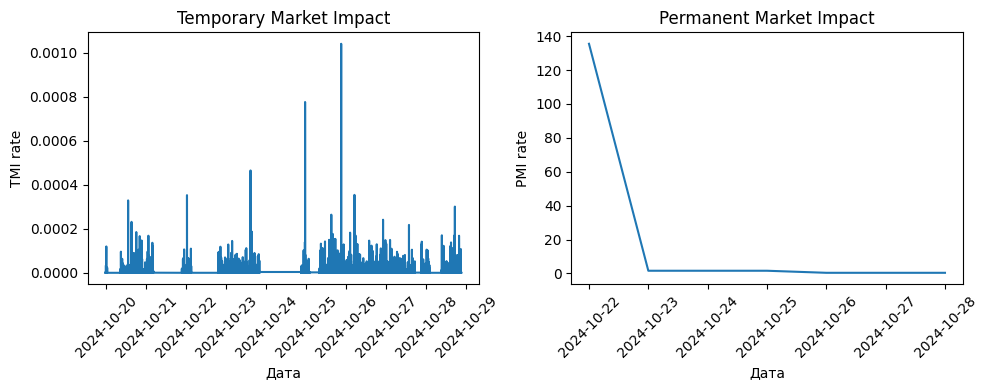

In [109]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# NOTUSDT

In [110]:
lob, trade = load_ticker_data(tickers[14])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420/420 [00:52<00:00,  8.04it/s]
12828it [00:38, 335.79it/s]


In [111]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

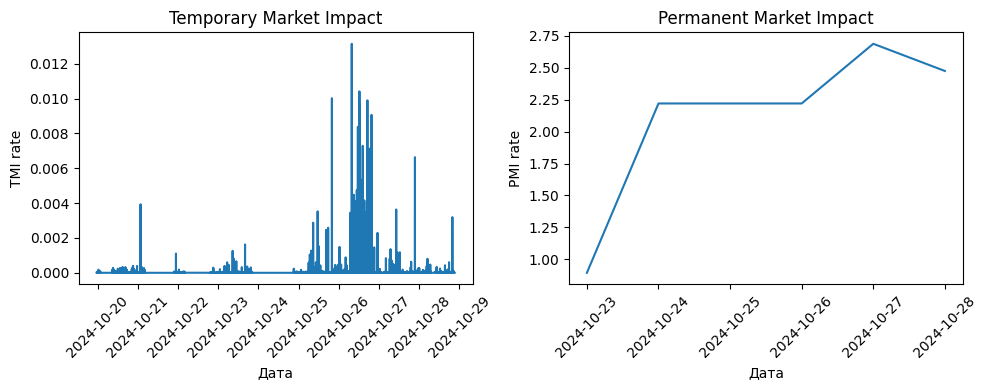

In [112]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# SOLUSDT

In [113]:
lob, trade = load_ticker_data(tickers[15])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 422/422 [00:48<00:00,  8.74it/s]
12828it [00:36, 353.03it/s]


In [114]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

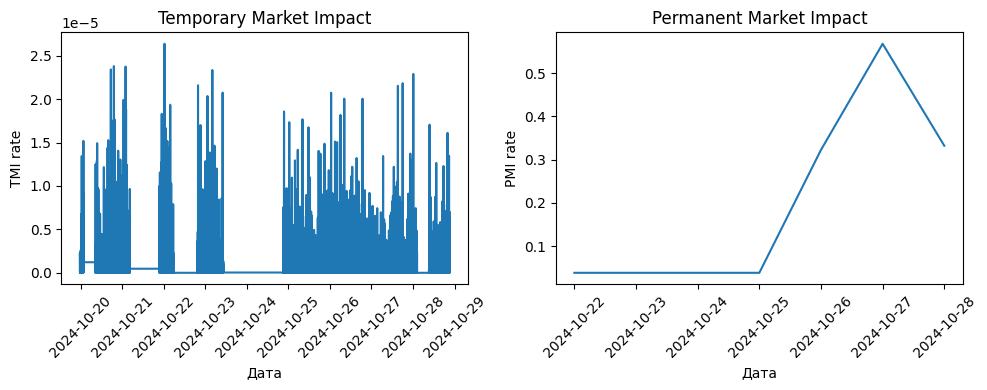

In [115]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# UNIUSDT

In [116]:
lob, trade = load_ticker_data(tickers[16])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420/420 [00:47<00:00,  8.81it/s]
12828it [00:34, 375.97it/s]


In [117]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

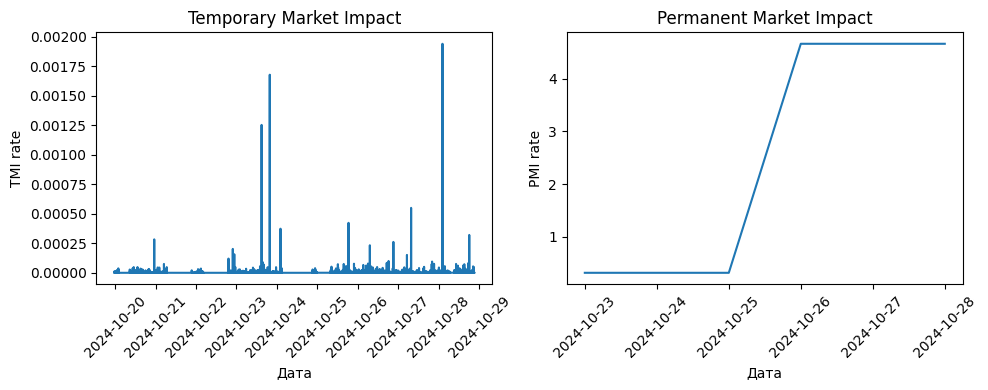

In [118]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# XMRUSDT

In [119]:
lob, trade = load_ticker_data(tickers[17])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420/420 [00:43<00:00,  9.68it/s]
12828it [00:36, 352.62it/s]


In [120]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

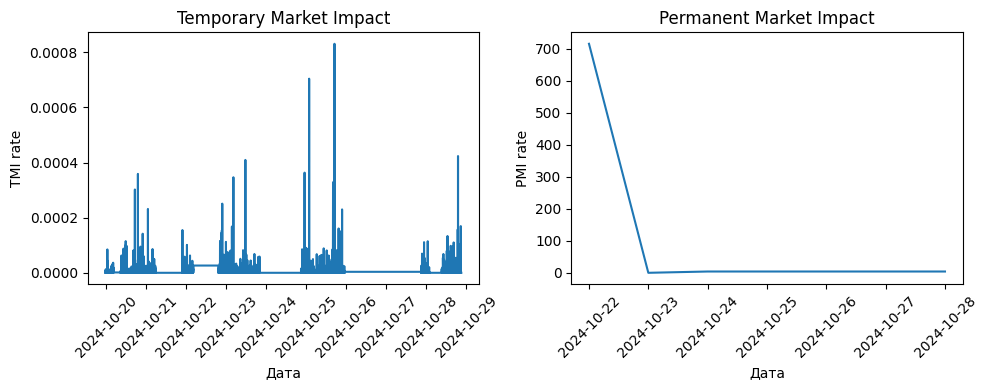

In [121]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# XRPUSDT

In [122]:
lob, trade = load_ticker_data(tickers[18])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 420/420 [00:48<00:00,  8.64it/s]
12827it [00:37, 337.88it/s]


In [123]:
TMI = calc_TMI(trade, lob, '1min')
PMI = calc_PMI(trade, lob)

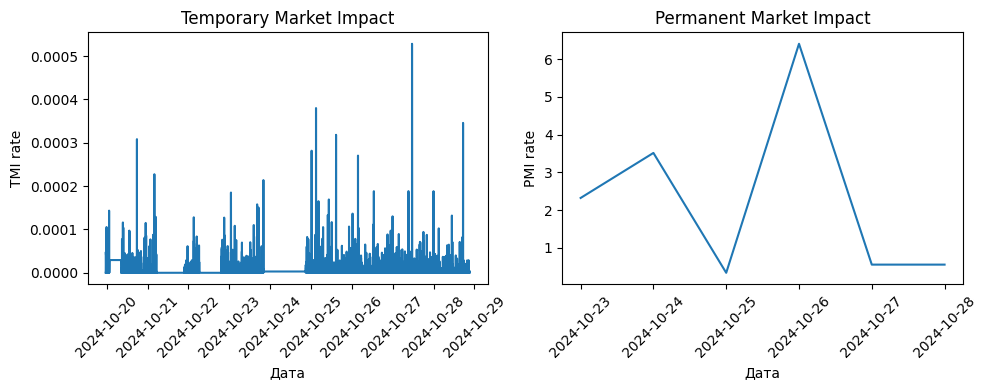

In [124]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].plot(TMI)
axs[0].set_title('Temporary Market Impact')
axs[0].set_xlabel('Дата')
axs[0].set_ylabel('TMI rate')
axs[0].tick_params(axis='x', rotation=45)

axs[1].plot(PMI)
axs[1].set_title('Permanent Market Impact')
axs[1].set_xlabel('Дата')
axs[1].set_ylabel('PMI rate')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()